In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *

In [ ]:
%cd /content/gdrive/MyDrive/project/HackerEarth/STILLthe_season_to_be_jolly

/content/gdrive/MyDrive/project/HackerEarth/STILLthe_season_to_be_jolly


In [ ]:
!ls

alexnet.csv	    requirements_updates.txt  v2_densenet201.csv
dataset		    resnet101.csv	      v2_resnet101.csv
dataset.zip	    resnet152.csv	      v2_resnet152.csv
fastai_1_7_gpu.txt  resnet34.csv	      v2_resnet34.csv
requirements.txt    resnet50.csv	      v2_vgg16_bn.csv


In [ ]:
%cd dataset/

/content/gdrive/MyDrive/project/HackerEarth/STILLthe_season_to_be_jolly/dataset


In [ ]:
!mkdir created
!mkdir created/train_set

mkdir: cannot create directory ‘created’: File exists
mkdir: cannot create directory ‘created/train_set’: File exists


In [ ]:
import pandas as pd
train = pd.read_csv('train.csv')
train.head()

,Image,Class
0,image3476.jpg,Miscellaneous
1,image5198.jpg,Candle
2,image4183.jpg,Snowman
3,image1806.jpg,Miscellaneous
4,image7831.jpg,Miscellaneous


In [ ]:
for i in train.Class.unique():
  os.mkdir("created/train_set/"+i)

'\nfor i in train.Class.unique():\n  os.mkdir("created/train_set/"+i)\n'

In [ ]:
import shutil
for i,j in zip(train.Image,train.Class):
    try:
      source = "train/"+i
      #img = cv2.imread(source)
      destination = "created/train_set/"+j+"/"+i
      #img = cv2.resize(img, (224, 224,3))
      #cv2.imwrite(destination, img)
      shutil.copy(source, destination)
    except:
      continue  

'\nimport shutil\nfor i,j in zip(train.Image,train.Class):\n    try:\n      source = "train/"+i\n      #img = cv2.imread(source)\n      destination = "created/train_set/"+j+"/"+i\n      #img = cv2.resize(img, (224, 224,3))\n      #cv2.imwrite(destination, img)\n      shutil.copy(source, destination)\n    except:\n      continue  \n  '

In [ ]:
for i in train.Class.unique():
  print(i ," : ",len(os.listdir("created/train_set/"+i)))

Miscellaneous  :  2801
Candle  :  593
Snowman  :  361
Airplane  :  535
Christmas_Tree  :  1539
Jacket  :  640


In [ ]:
tfms = aug_transforms(do_flip = True, flip_vert = True, mult=2.0 )

In [ ]:
#data= ImageDataLoaders.from_folder("created/train_set",train = "train", valid_pct=0.2, item_tfms=Resize(128), batch_tfms=tfms, bs = 30, num_workers = 4)

In [ ]:
#data.train.show_batch(max_n=4, nrows=1)

In [ ]:
import fastai
import torch
import torchvision
import fastbook
print("Fastbook : ",fastbook.__version__)
print("torchvision : ",torchvision.__version__)
print("torch : ",torch.__version__)
print("fastai : ",fastai.__version__)

Fastbook :  0.0.16
torchvision :  0.8.1+cu101
torch :  1.7.0+cu101
fastai :  2.2.5


# Resnet 152 fit_one_cycle

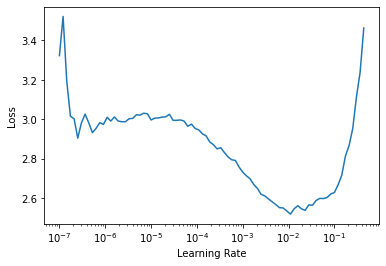

In [ ]:
import matplotlib.pyplot as plt
from fastai.data.all import *
from fastai.vision.core import *
from fastai.vision.data import *
item_tfms1= Resize(256, ResizeMethod.Squish)
item_tfms2=Resize(256, ResizeMethod.Pad, pad_mode='zeros')
item_tfms3=RandomResizedCrop(256, min_scale=0.3)
#scales = [0.1, 0.3, 0.5, 0.7, 0.9]
item_tmfs4 = FlipItem(p=0.5)
item_tfms = [item_tfms1,item_tfms2,item_tfms3,item_tmfs4]

path = Path ('created/train_set')
batch_tfms = [RandomResizedCrop(224), *aug_transforms(mult=1.0, do_flip=True, max_rotate=30.0, max_zoom=1.5,
                            max_lighting=.8, max_warp=0.3, p_lighting=.9)]
data= ImageDataLoaders.from_folder(path,train = "train", valid_pct=0.1, item_tfms=item_tfms, batch_tfms=batch_tfms, bs = 32)
learn = cnn_learner(data, resnet152, metrics=[F1Score(average='weighted'),error_rate,accuracy])
lr_min,lr_max = learn.lr_find()

In [ ]:
learn.fit_one_cycle(5,lr_max=slice(lr_min,lr_max))

epoch,train_loss,valid_loss,f1_score,error_rate,accuracy,time
0,1.609291,0.790383,0.778237,0.222910,0.777090,03:01
1,1.086217,0.282116,0.902227,0.097523,0.902477,03:01
2,0.789819,0.207187,0.931829,0.068111,0.931889,03:01
3,0.640491,0.182111,0.936489,0.063467,0.936532,03:01
4,0.600759,0.171114,0.936500,0.063467,0.936532,03:01


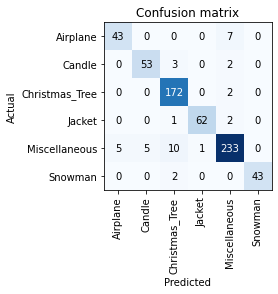

           Image
0  image3344.jpg
1  image6295.jpg
2  image7473.jpg
3  image3960.jpg
4  image2510.jpg


0


100


200


300


400


500


600


700


800


900


1000


1100


1200


1300


1400


1500


1600


1700


1800


1900


2000


2100


2200


2300


2400


2500


2600


2700


2800


2900


3000


3100


3200


3300


3400


CPU times: user 5min 53s, sys: 11.5 s, total: 6min 5s
Wall time: 6min 43s


In [ ]:
%%time
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
plt.show()

test = pd.DataFrame()
test['Image'] = os.listdir('test')
print(test.head())

lis = []
count = 0
for i in test['Image']:
  pred_class,pred_idx,outputs = learn.predict("test/"+i)
  lis.append(pred_class)
  if count%100==0:
    print(count)
  count+=1
test['Class'] = lis
test.to_csv("test29_20c.csv",index=False)

In [ ]:
!ls

created     test13.csv	test22.csv  test28.csv	    test3.csv  test8.csv
test	    test14.csv	test23.csv  test29_10c.csv  test4.csv  train
test10.csv  test1.csv	test24.csv  test29_15c.csv  test5.csv  train.csv
test11.csv  test20.csv	test25.csv  test29_5c.csv   test6.csv
test12.csv  test21.csv	test26.csv  test2.csv	    test7.csv


In [ ]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               79
Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:            0
CPU MHz:             2199.998
BogoMIPS:            4399.99
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            56320K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_sin

In [ ]:
!hwinfo --short

/bin/bash: hwinfo: command not found


# Resnet152 fine_tune

In [ ]:
import matplotlib.pyplot as plt
from fastai.data.all import *
from fastai.vision.core import *
from fastai.vision.data import *
item_tfms1= Resize(256, ResizeMethod.Squish)
item_tfms2=Resize(256, ResizeMethod.Pad, pad_mode='zeros')
item_tfms3=RandomResizedCrop(256, min_scale=0.3)
#scales = [0.1, 0.3, 0.5, 0.7, 0.9]
item_tfms = [item_tfms1,item_tfms2,item_tfms3]

path = Path ('created/train_set')
data= ImageDataLoaders.from_folder(path,train = "train", valid_pct=0.1, 
                                   item_tfms = [FlipItem(p=0.5),Resize(256,method='pad'),item_tfms1,item_tfms3],                
                                   batch_tfms=[RandomResizedCrop(256), 
                                   *aug_transforms(size=256,do_flip=True, 
                                              flip_vert=True, 
                                              max_rotate=180.0, 
                                              max_lighting=0.6,max_warp=0.3, 
                                              p_affine=0.75, p_lighting=0.9,
                                              xtra_tfms=[RandomErasing(p=0.5,sh=0.1, min_aspect=0.2,max_count=2)])], 
                                   bs = 32)
learn = cnn_learner(data, resnet152, metrics=[error_rate,F1Score(average='weighted')])
learn.fine_tune(10)

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth


epoch,train_loss,valid_loss,error_rate,f1_score,time
0,1.629119,0.666702,0.216718,0.783124,17:35


epoch,train_loss,valid_loss,error_rate,f1_score,time
0,0.959097,0.360501,0.134675,0.863988,04:20
1,0.862173,0.366831,0.140867,0.860872,04:19
2,0.800916,0.406357,0.123839,0.876758,04:19
3,0.744564,0.378923,0.134675,0.864904,04:19
4,0.683017,0.353217,0.122291,0.877833,04:19
5,0.591665,0.312046,0.100619,0.899825,04:19
6,0.575667,0.257521,0.085139,0.914558,04:19
7,0.501871,0.237530,0.082043,0.918095,04:18
8,0.427073,0.220943,0.080495,0.919728,04:19
9,0.420296,0.227570,0.078947,0.921493,04:19


In [ ]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,f1_score,time
0,0.447005,0.228602,0.083591,0.916469,03:13


epoch,train_loss,valid_loss,error_rate,f1_score,time
0,0.471880,0.285978,0.114551,0.885891,04:15
1,0.525548,0.256780,0.085139,0.914781,04:16
2,0.602746,0.380413,0.128483,0.873795,04:16
3,0.586168,0.356916,0.119195,0.881355,04:15
4,0.542249,0.302735,0.099071,0.902064,04:16
5,0.493251,0.269558,0.091331,0.908443,04:15
6,0.418739,0.271318,0.103715,0.896593,04:16
7,0.359851,0.252538,0.083591,0.916644,04:15
8,0.346738,0.232940,0.082043,0.918115,04:16
9,0.349440,0.236558,0.086687,0.913583,04:16


In [ ]:
preds,targs = learn.tta()
print(accuracy(preds, targs).item())

0.9071207642555237


In [ ]:
import gc
torch.cuda.empty_cache()
gc.collect()

134